<a href="https://colab.research.google.com/github/Adidev44480/Laptop-Price-Prediction/blob/main/Laptop_Price_Pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                         **LAPTOP PRICE PREDICTION**

Predicting the price of laptop on the basis of Context A dataset for 1200+ laptop models with columns:

Company Name, Product Name, Laptop Type, Screen Inches, Screen Resolution, CPU Model, RAM Characteristics, Memory, GPU Characteristics, Operating System, Laptop's Weight, Laptop's Price in Euro.


### **Machine Leaning Problem**

It is a Regresion problem, for a given columns we need to predict the price of laptop.

### **Assumptions:**

### **Performance Metric**



1. R2 Score
2. Mean Absolute Error



## **Reading data and basic stats**

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing dataset
df=pd.read_csv("/laptop_price - dataset.csv")
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [ ]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')

In [ ]:
df.shape

(1275, 15)

#### **Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [ ]:
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
CPU_Company,0
CPU_Type,0
CPU_Frequency (GHz),0
RAM (GB),0
Memory,0


In [ ]:
df.duplicated().sum()

0

## **Exploratory Data Analysis and Feature Engineering**

<Axes: xlabel='Price', ylabel='Density'>

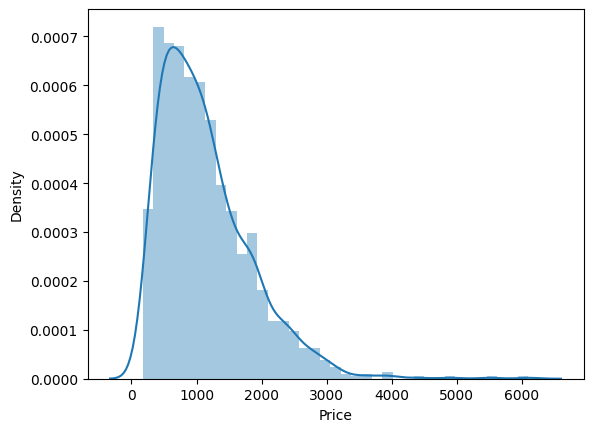

In [ ]:
# Rename the "Price (Euro)" column as "Price"
df = df.rename(columns={"Price (Euro)": "Price"})
sns.distplot(df["Price"])

#### **Company**

<Axes: xlabel='Company'>

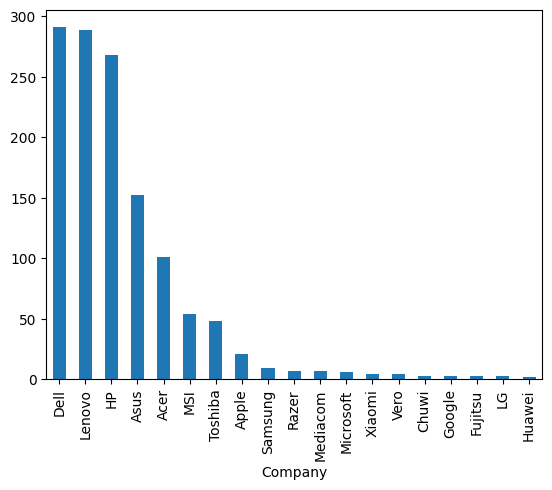

In [ ]:
df["Company"].value_counts().plot(kind="bar")

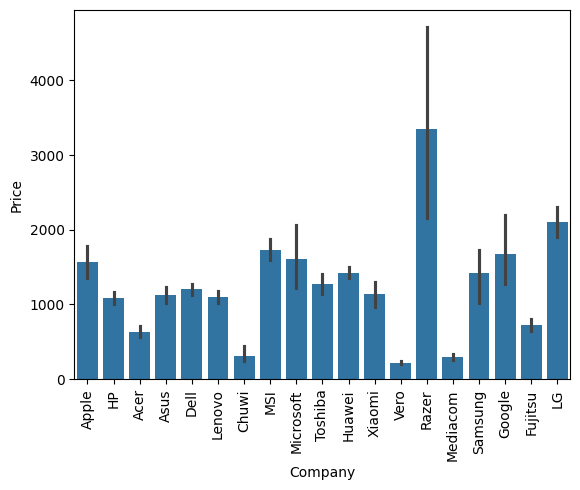

In [ ]:
sns.barplot(x=df["Company"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

#### **TypeName**

<Axes: xlabel='TypeName'>

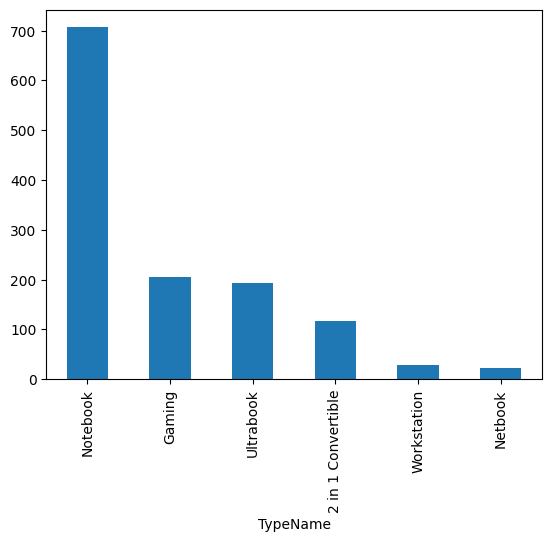

In [ ]:
df["TypeName"].value_counts().plot(kind="bar")

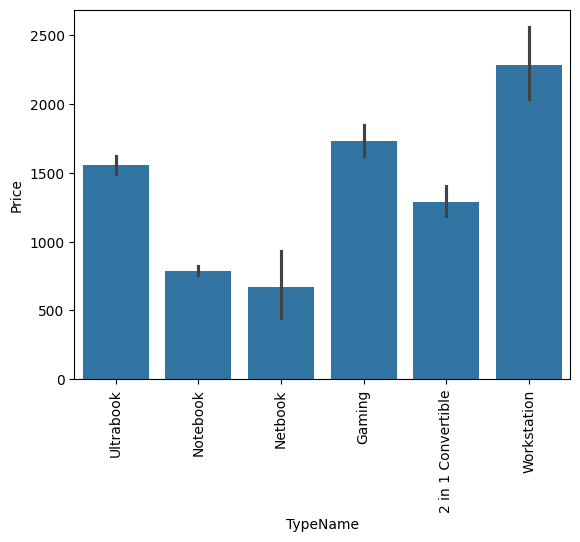

In [ ]:
sns.barplot(x=df["TypeName"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

#### **ScreenSize**

<Axes: ylabel='Density'>

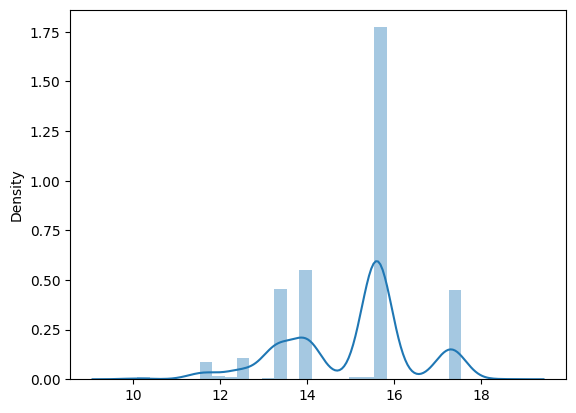

In [ ]:
sns.distplot(x=df["Inches"])

<Axes: xlabel='Inches', ylabel='Price'>

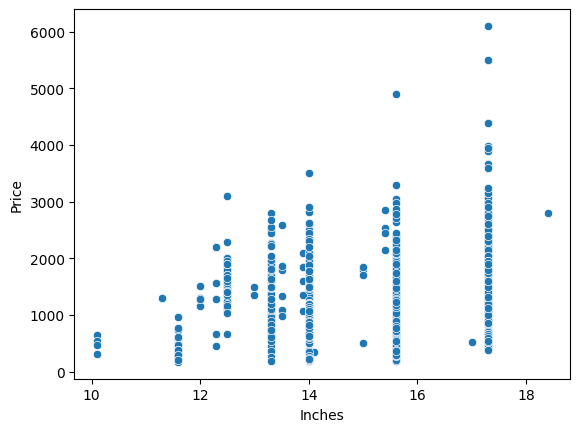

In [ ]:
sns.scatterplot(x="Inches",y="Price",data=df)

#### **ScreenResolution**

In [ ]:
df["ScreenResolution"].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,505
1366x768,263
IPS Panel Full HD 1920x1080,226
IPS Panel Full HD / Touchscreen 1920x1080,51
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


> *Creating Touchscreen Column*

In [ ]:
df["Touchscreen"]=df["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)

In [ ]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price,Touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,0


<Axes: xlabel='Touchscreen'>

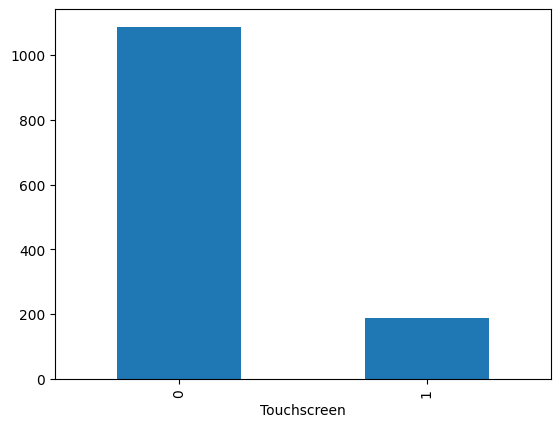

In [ ]:
df["Touchscreen"].value_counts().plot(kind="bar")

<Axes: xlabel='Touchscreen', ylabel='Price'>

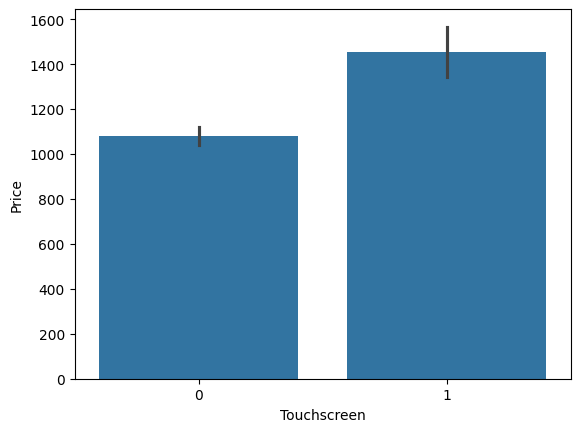

In [ ]:
sns.barplot(x=df["Touchscreen"],y=df["Price"])

> *Creating IPS Column*

In [ ]:
df["Ips"]=df["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price,Touchscreen,Ips
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,0,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,0,1


<Axes: xlabel='Ips', ylabel='Price'>

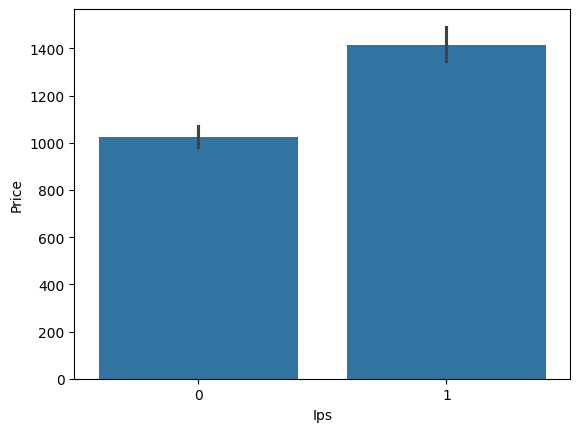

In [ ]:
sns.barplot(x=df["Ips"],y=df["Price"])

In [ ]:
# In ScreenResolution column, dimension is made readable
df["ScreenResolution"].str.split("x")

,ScreenResolution
0,"[IPS Panel Retina Display 2560, 1600]"
1,"[1440, 900]"
2,"[Full HD 1920, 1080]"
3,"[IPS Panel Retina Display 2880, 1800]"
4,"[IPS Panel Retina Display 2560, 1600]"
...,...
1270,"[IPS Panel Full HD / Touchscreen 1920, 1080]"
1271,"[IPS Panel Quad HD+ / Touchscreen 3200, 1800]"
1272,"[1366, 768]"
1273,"[1366, 768]"


In [ ]:
temp = df["ScreenResolution"].str.split("x",n=1,expand=True)

In [ ]:
df["X_res"]=temp[0]
df["Y_res"]=temp[1]

In [ ]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price,Touchscreen,Ips,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,0,0,Full HD 1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,0,1,IPS Panel Retina Display 2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,IPS Panel Retina Display 2560,1600


In [ ]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price,Touchscreen,Ips,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [ ]:
df["X_res"] = df["X_res"].astype("int")
df["Y_res"] = df["Y_res"].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price                1275 non-null   float64
 15  Touchscreen          1275 non-null   i

> **Correlation of "Price" with all other Numeric variables**

In [ ]:
df.corr(numeric_only=True)["Price"]

,Price
Inches,0.066608
CPU_Frequency (GHz),0.428847
RAM (GB),0.740287
Weight (kg),0.211883
Price,1.000000
Touchscreen,0.188886
Ips,0.250737
X_res,0.552491
Y_res,0.548529


| **Creating PPI column**

In [ ]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.corr(numeric_only=True)["Price"]

,Price
Inches,0.066608
CPU_Frequency (GHz),0.428847
RAM (GB),0.740287
Weight (kg),0.211883
Price,1.000000
Touchscreen,0.188886
Ips,0.250737
X_res,0.552491
Y_res,0.548529
ppi,0.470032


In [ ]:
df.drop(columns=["ScreenResolution","X_res","Y_res","Inches"],inplace=True)

In [ ]:
df.drop(columns=["Product"],inplace=True)

In [ ]:
df.head()

,Company,TypeName,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005
1,Apple,Ultrabook,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940
2,HP,Notebook,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,0,0,141.211998
3,Apple,Ultrabook,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624
4,Apple,Ultrabook,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005


| **Dropping unnecessary columns**

#### **CPU**

In [ ]:
# Create a new column 'CPU' combining 'CPU_Company' and 'CPU_Type'
df['CPU'] = df['CPU_Company'] + ' ' + df['CPU_Type']

In [ ]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    elif text.split()[0] == 'Intel':
        if text.split()[2] == 'i7':
            return 'Intel Core i7'
        elif text.split()[2] == 'i5':
            return 'Intel Core i5'
        elif text.split()[2] == 'i3':
            return 'Intel Core i3'
        else:
          return 'Other Intel Processor'
    else:
        return 'AMD Processor'

In [ ]:
df['CPU'] = df['CPU'].apply(fetch_processor)

In [ ]:
df.head()

,Company,TypeName,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price,Touchscreen,Ips,ppi,CPU
0,Apple,Ultrabook,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


In [ ]:
df["CPU"].value_counts()

,count
CPU,
Intel Core i7,515
Intel Core i5,423
Other Intel Processor,142
Intel Core i3,134
AMD Processor,61


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i7'),
  Text(1, 0, 'Intel Core i5'),
  Text(2, 0, 'Other Intel Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'AMD Processor')])

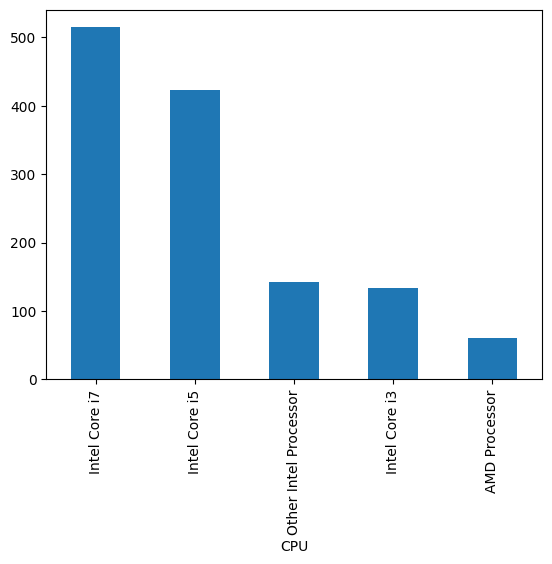

In [ ]:
df['CPU'].value_counts().plot(kind='bar')
plt.xticks(rotation='vertical')

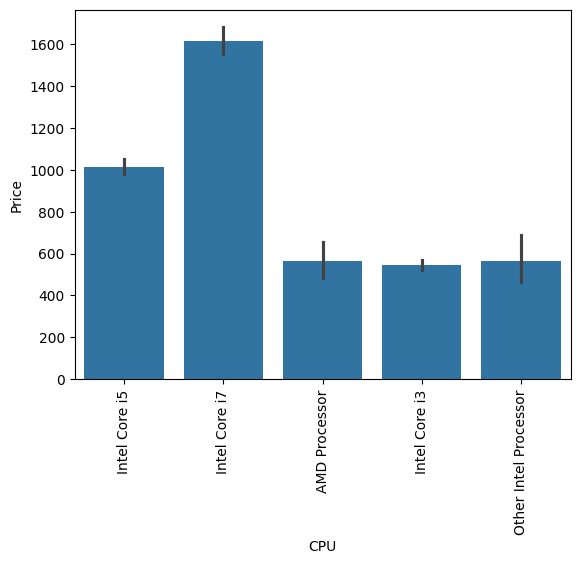

In [ ]:
sns.barplot(x=df['CPU'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Dropping Unnecessary columns
df.drop(columns=['CPU_Company','CPU_Type','CPU_Frequency (GHz)'],inplace=True)

#### **RAM**

<Axes: xlabel='RAM (GB)'>

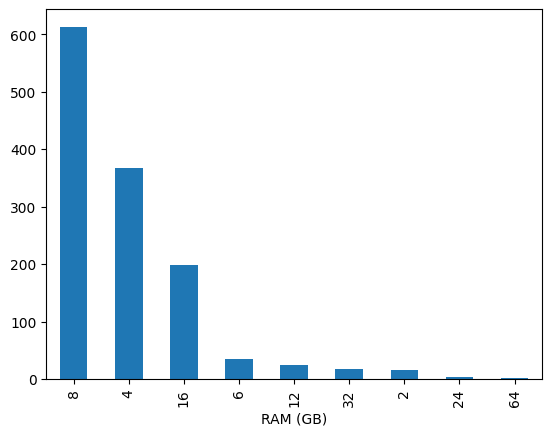

In [ ]:
df['RAM (GB)'].value_counts().plot(kind='bar')

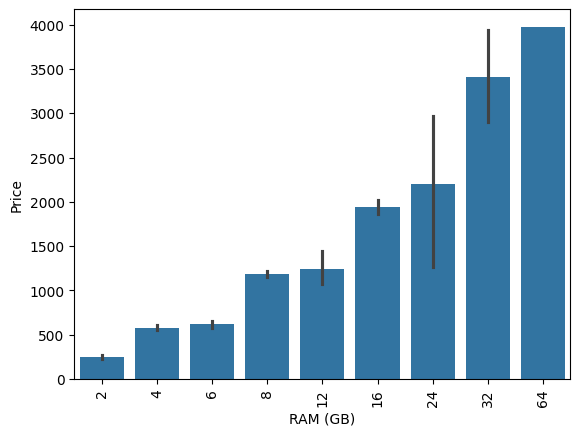

In [ ]:
sns.barplot(x=df['RAM (GB)'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

#### **Memory**

In [ ]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,215
500GB HDD,124
512GB SSD,114
128GB SSD + 1TB HDD,94
128GB SSD,74
256GB SSD + 1TB HDD,73
32GB Flash Storage,36
2TB HDD,16


> **Extracting different types of Memory**

In [ ]:
df['Memory'] = df['Memory'].astype(str).str.replace(r'\.0', '', regex=True).str.replace('GB', '').str.replace('TB', '000')

new = df['Memory'].str.split('+', n=1, expand=True)
df['first'] = new[0].str.strip()
df['second'] = new[1].fillna('0').str.strip()

# Classify storage types
storage_types = ['HDD', 'SSD', 'Hybrid', 'Flash Storage']
for layer in ['first', 'second']:
    for storage in storage_types:
        df[f'Layer{1 if layer=="first" else 2}{storage}'] = df[layer].str.contains(storage, na=False).astype(int)

# Remove non-numeric characters and convert to integers
df['first'] = df['first'].str.extract('(\d+)').fillna(0).astype(int)
df['second'] = df['second'].str.extract('(\d+)').fillna(0).astype(int)

# Calculate total storage
for storage in storage_types:
    df[storage] = df['first'] * df[f'Layer1{storage}'] + df['second'] * df[f'Layer2{storage}']

# Drop unnecessary columns
df.drop(columns=[f'Layer{layer}{storage}' for layer in [1, 2] for storage in storage_types] + ['first', 'second'], inplace=True)

In [ ]:
df.head()

,Company,TypeName,RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price,Touchscreen,Ips,ppi,CPU,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,8,128 SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel,HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,0,0


In [ ]:
df.drop(columns=['Memory'],inplace=True)

In [ ]:
df.corr(numeric_only=True)['Price']


,Price
RAM (GB),0.740287
Weight (kg),0.211883
Price,1.000000
Touchscreen,0.188886
Ips,0.250737
ppi,0.470032
HDD,-0.098108
SSD,0.670237
Hybrid,0.022598
Flash Storage,-0.037031


In [ ]:
# Because of minimal dependence "Hybrid" and "Flash Storage" columns can be dropped
df.drop(columns=['Hybrid','Flash Storage'],inplace=True)

#### **GPU**

In [ ]:
# Create a new column 'GPU' combining 'GPU_Company' and 'GPU_Type'
df['GPU'] = df['GPU_Company'] + ' ' + df['GPU_Type']

In [ ]:
# "GPU_Type" has to much of variability so it is dropped
df.drop(columns=['GPU_Type'],inplace=True)

In [ ]:
df['GPU_Company'].value_counts()

,count
GPU_Company,
Intel,704
Nvidia,396
AMD,174
ARM,1


In [ ]:
df = df[df['GPU_Company'] != 'ARM']   # "ARM" appears one once so it can be dropped
df['GPU_Company'].value_counts()

,count
GPU_Company,
Intel,704
Nvidia,396
AMD,174


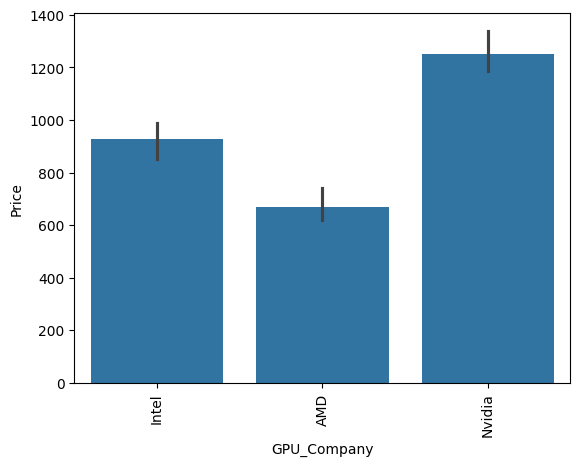

In [ ]:
sns.barplot(x=df['GPU_Company'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.drop(columns=['GPU'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,RAM (GB),GPU_Company,OpSys,Weight (kg),Price,Touchscreen,Ips,ppi,CPU,HDD,SSD
0,Apple,Ultrabook,8,Intel,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256


#### **Operating System**

In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1048
No OS,66
Linux,58
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


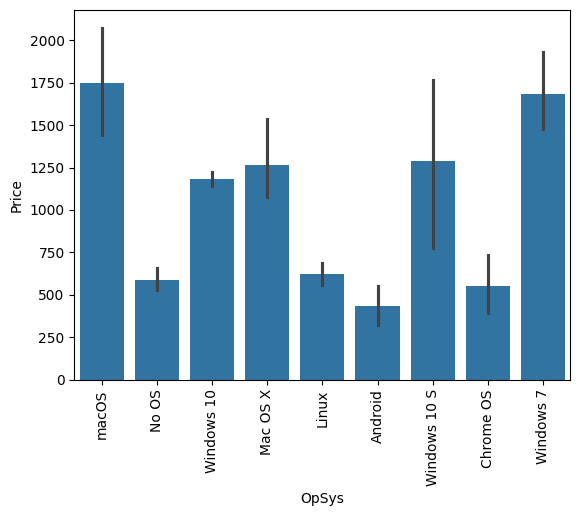

In [ ]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Function for categorizing OpSys into three major categories
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [ ]:
df['os'] = df['OpSys'].apply(cat_os)

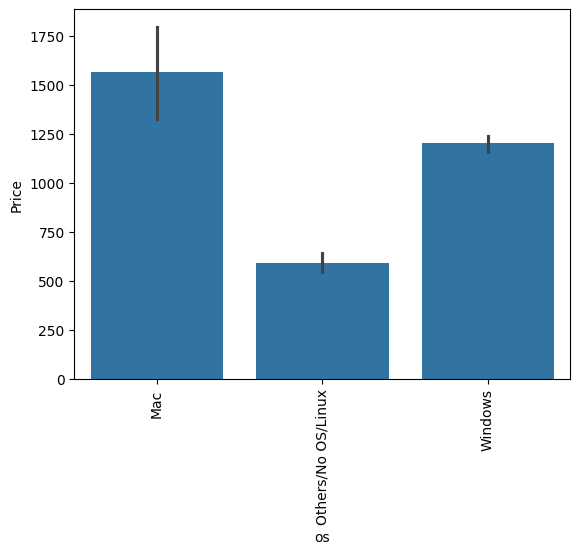

In [ ]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.drop(columns=['OpSys'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,RAM (GB),GPU_Company,Weight (kg),Price,Touchscreen,Ips,ppi,CPU,HDD,SSD,os
0,Apple,Ultrabook,8,Intel,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Mac
1,Apple,Ultrabook,8,Intel,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Mac
2,HP,Notebook,8,Intel,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Others/No OS/Linux
3,Apple,Ultrabook,16,AMD,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,Mac
4,Apple,Ultrabook,8,Intel,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Mac


#### **Weight**

<Axes: xlabel='Weight (kg)', ylabel='Density'>

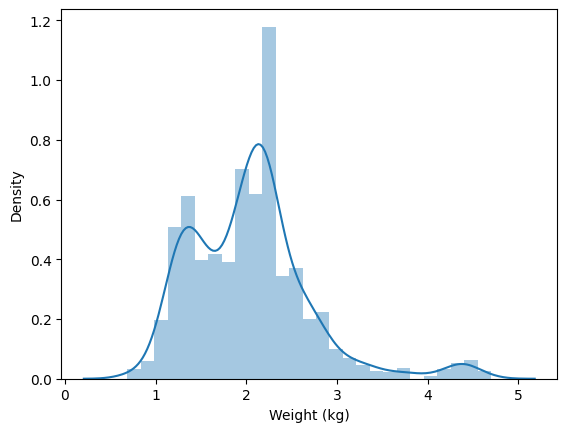

In [ ]:
sns.distplot(df['Weight (kg)'])

<Axes: xlabel='Weight (kg)', ylabel='Price'>

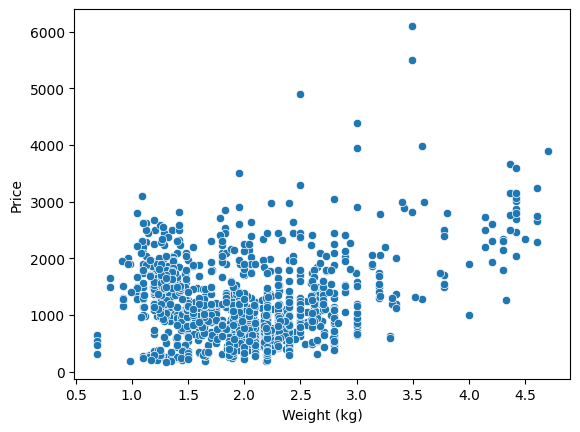

In [ ]:
sns.scatterplot(x=df['Weight (kg)'],y=df['Price'])

#### **Heatmap**

|  **Correlation of "Price" with all other numeric variables in filtered data**

In [ ]:
df.corr(numeric_only=True)['Price']

,Price
RAM (GB),0.740176
Weight (kg),0.211359
Price,1.000000
Touchscreen,0.190636
Ips,0.251892
ppi,0.471973
HDD,-0.098577
SSD,0.670088


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1274
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1274 non-null   object 
 1   TypeName     1274 non-null   object 
 2   RAM (GB)     1274 non-null   int64  
 3   GPU_Company  1274 non-null   object 
 4   Weight (kg)  1274 non-null   float64
 5   Price        1274 non-null   float64
 6   Touchscreen  1274 non-null   int64  
 7   Ips          1274 non-null   int64  
 8   ppi          1274 non-null   float64
 9   CPU          1274 non-null   object 
 10  HDD          1274 non-null   int64  
 11  SSD          1274 non-null   int64  
 12  os           1274 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 139.3+ KB


<Axes: >

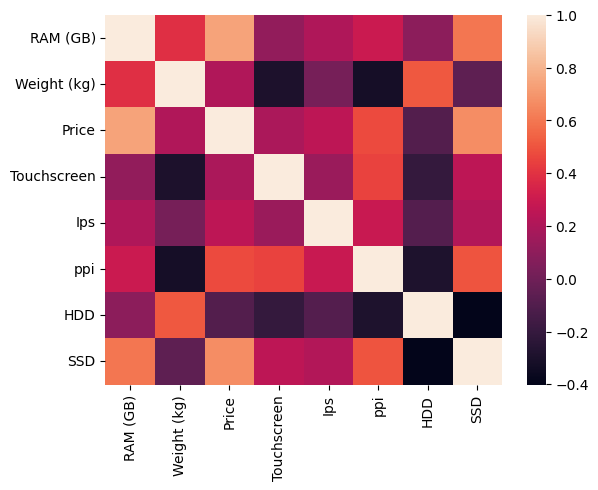

In [ ]:
sns.heatmap(df.corr(numeric_only=True))

<Axes: xlabel='Price', ylabel='Density'>

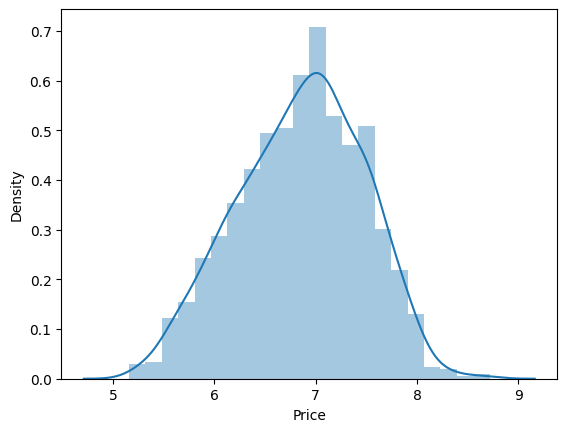

In [ ]:
sns.distplot(np.log(df['Price']))

## **Model Fitting- Linear Regression**

In [ ]:
# Dependent Variables
X = df.drop(columns=['Price'])

# Independent Variable
y = np.log(df['Price'])

In [ ]:
X

,Company,TypeName,RAM (GB),GPU_Company,Weight (kg),Touchscreen,Ips,ppi,CPU,HDD,SSD,os
0,Apple,Ultrabook,8,Intel,1.37,0,1,226.983005,Intel Core i5,0,128,Mac
1,Apple,Ultrabook,8,Intel,1.34,0,0,127.677940,Intel Core i5,0,0,Mac
2,HP,Notebook,8,Intel,1.86,0,0,141.211998,Intel Core i5,0,256,Others/No OS/Linux
3,Apple,Ultrabook,16,AMD,1.83,0,1,220.534624,Intel Core i7,0,512,Mac
4,Apple,Ultrabook,8,Intel,1.37,0,1,226.983005,Intel Core i5,0,256,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,2 in 1 Convertible,4,Intel,1.80,1,1,157.350512,Intel Core i7,0,128,Windows
1271,Lenovo,2 in 1 Convertible,16,Intel,1.30,1,1,276.053530,Intel Core i7,0,512,Windows
1272,Lenovo,Notebook,2,Intel,1.50,0,0,111.935204,Other Intel Processor,0,0,Windows
1273,HP,Notebook,6,AMD,2.19,0,0,100.454670,Intel Core i7,1000,0,Windows


In [ ]:
y

,Price
0,7.200194
1,6.801216
2,6.354370
3,7.838915
4,7.497540
...,...
1270,6.458338
1271,7.312553
1272,5.433722
1273,6.638568


#### **Five main assumptions underlying multiple regression models must be satisfied:**

1. Linearity
2. Homoskedasticity
3. Independence of errors
4. Normality
5. Independence of independent variables

In [ ]:
# Package to split your dataset into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
# This is the actual regression model that will be fitted to your data
from sklearn.linear_model import LinearRegression

In [ ]:
# These metrics are used to evaluate the performance of your fitted model
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
# If your dataset includes categorical variables or requires specific preprocessing (like scaling), these components are helpful
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [ ]:
# Define the column transformer for categorical variables
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 3, 8, 11])  # Adjust indices as needed
], remainder='passthrough')

# Define the linear regression model
step2 = LinearRegression()

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 3, 8, 11])])),
                ('step2', LinearRegression())])

In [ ]:
print(X_train.dtypes)

Company         object
TypeName        object
RAM (GB)         int64
GPU_Company     object
Weight (kg)    float64
Touchscreen      int64
Ips              int64
ppi            float64
CPU             object
HDD              int64
SSD              int64
os              object
dtype: object


In [ ]:
# Make predictions on the test data
y_pred = pipe.predict(X_test)

In [ ]:
# Evaluate the model performance
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8002605331393127
MAE: 0.20876282565160656
